In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data set
df = pd.read_csv(r"C:\Users\Sooraj\Downloads\bank-full.csv", delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.shape

(45211, 17)

In [5]:
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

In [6]:
X = df_encoded.drop(columns=['y'])
df['y'] = df_encoded['y'].map({'yes': 1, 'no': 0})
Y=df['y']

In [7]:
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [8]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

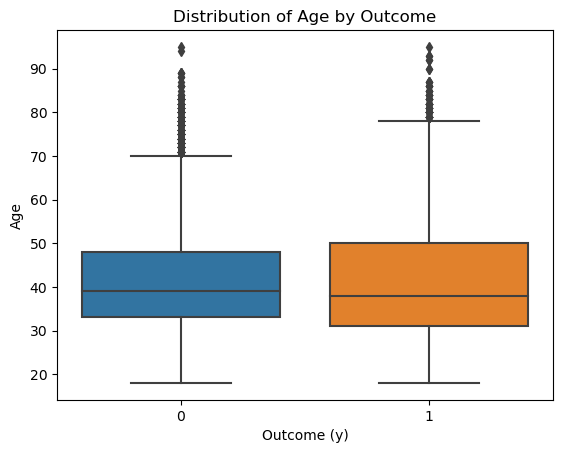

In [9]:
# Example: Visualizing the distribution of 'age' by class
sns.boxplot(x='y', y='age', data=df)
plt.xlabel('Outcome (y)')
plt.ylabel('Age')
plt.title('Distribution of Age by Outcome')
plt.show()

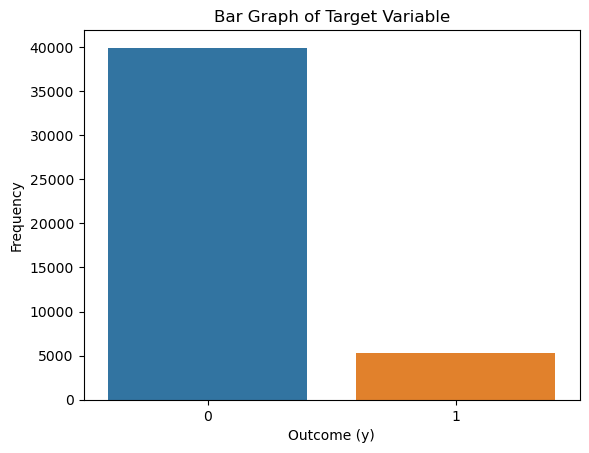

In [10]:
# Example: Bar graph of target variable 'y'
sns.countplot(x='y', data=df)
plt.xlabel('Outcome (y)')
plt.ylabel('Frequency')
plt.title('Bar Graph of Target Variable')
plt.show()

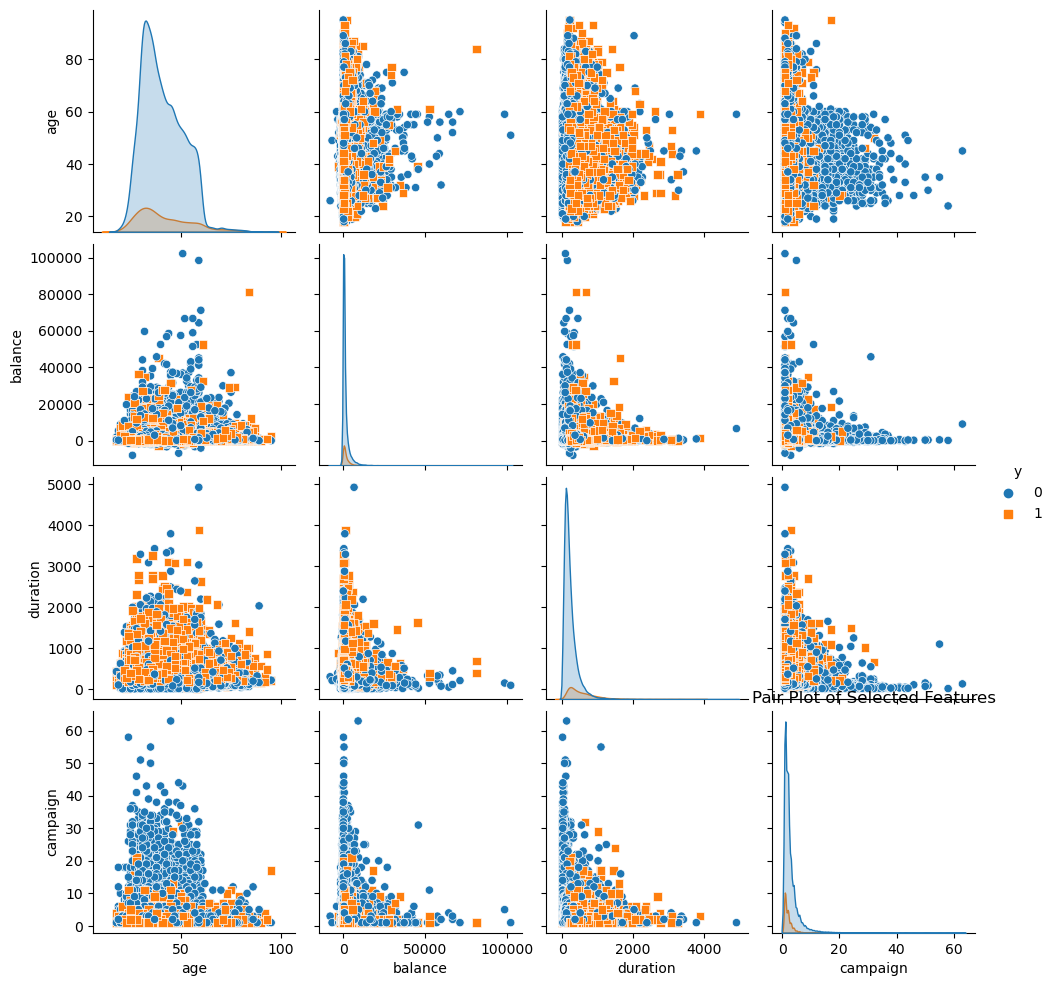

In [11]:
# Example: Pair plot for selected features
sns.pairplot(df[['age', 'balance', 'duration', 'campaign', 'y']], hue='y', markers=['o', 's'])
plt.title('Pair Plot of Selected Features')
plt.show()


C:\Users\Sooraj\AppData\Local\Temp\ipykernel_21756\1574737237.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


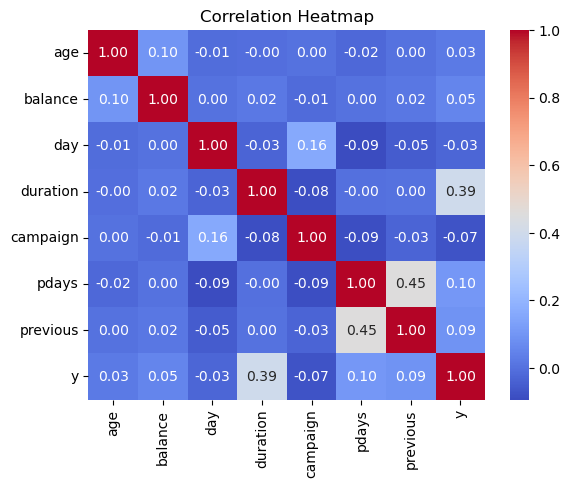

In [12]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
#Logistic regression and fit the model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [15]:
#Predict for X dataset
y_pred = classifier.predict(X_test)

In [16]:
y_pred_df = pd.DataFrame({'actual': y_test, 'predicted_prob': classifier.predict(X_test)})

In [17]:
y_pred_df

,actual,predicted_prob
3776,0,0
9928,0,0
33409,0,0
31885,0,0
15738,0,0
...,...,...
13353,0,0
38732,1,0
5654,0,0
3779,0,0


In [18]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
confusion_matrix =confusion_matrix(y_test, y_pred)
print (confusion_matrix)

[[7755  197]
 [ 719  372]]


In [19]:
((381+395)/(381+197+123+395))*100

70.8029197080292

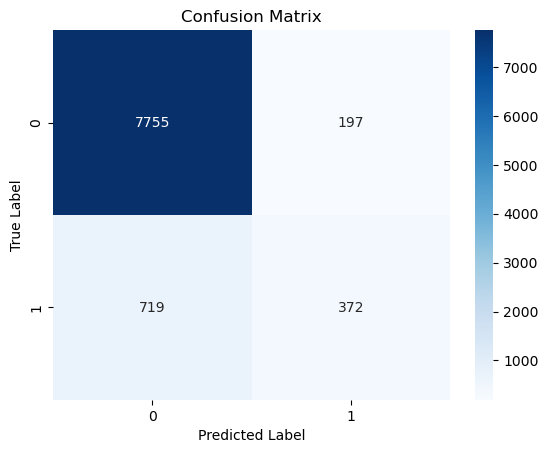

In [20]:
from sklearn.metrics import confusion_matrix as cm

# Calculate confusion matrix
conf_matrix = cm(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

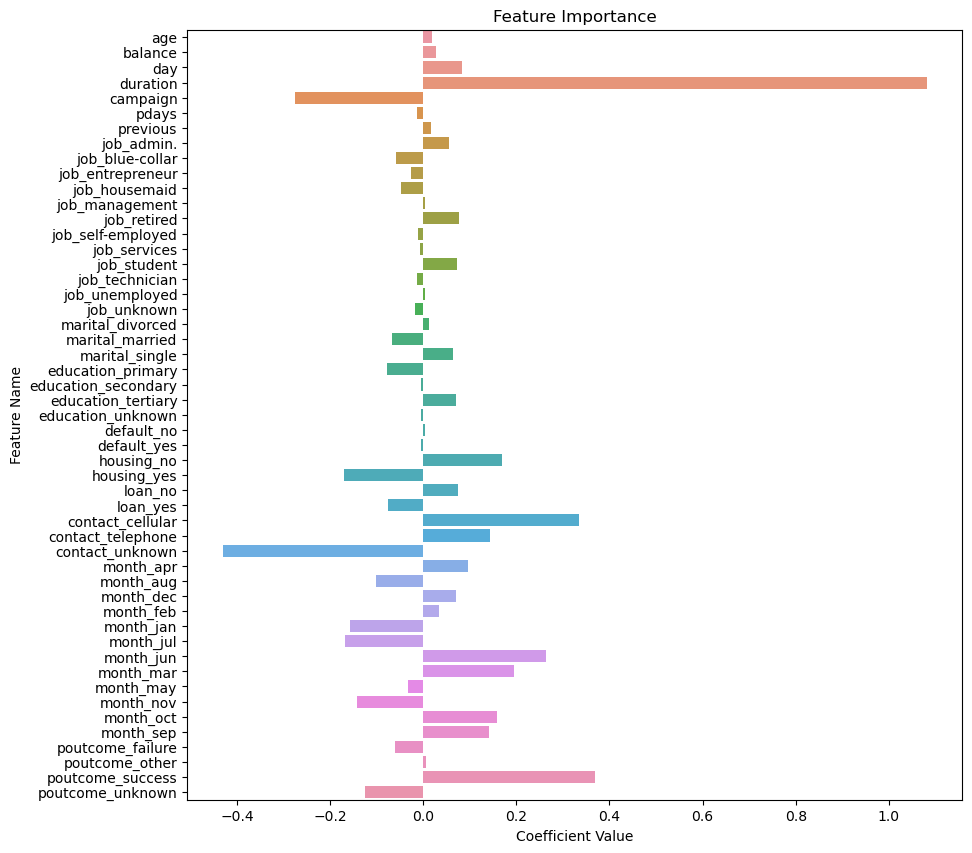

In [21]:
# Get feature importances
coefficients = classifier.coef_[0]
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 10))
sns.barplot(x=coefficients, y=feature_names, orient='h')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

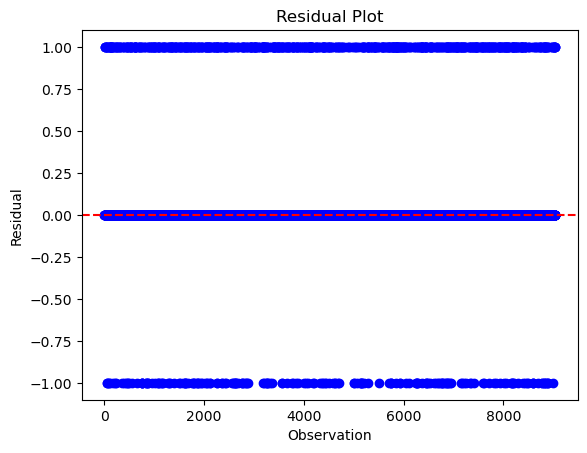

In [22]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(range(len(residuals)), residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()


In [23]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


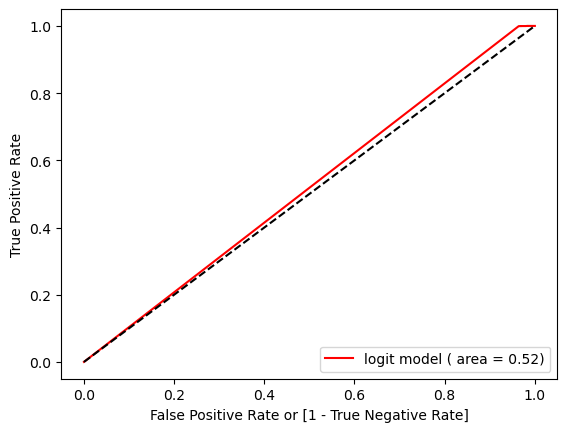

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calculate ROC curve data
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:, 1])

# Calculate AUC score using y_pred probabilities
auc = roc_auc_score(Y, classifier.predict_proba(X)[:, 1])

plt.plot(fpr, tpr, color='red', label='logit model ( area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [25]:
auc

0.5175751062084772

In [26]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8987061815769103

In [27]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Perform cross-validation to assess model performance
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Hyperparameter tuning using Grid Search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy_best)
print("Best Model Parameters:", best_model.get_params())


Cross-Validation Scores: [0.89908764 0.90143766 0.90282002 0.90308309 0.90529517]
Mean CV Accuracy: 0.9023447160151031
Best Model Accuracy: 0.8987061815769103
Best Model Parameters: {'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [28]:
# Prepare a new example in the same format as your training data
new_example = {'age': 40,'job': 'blue-collar','marital': 'married','education': 'primary','default': 'no','balance': 2000,'housing': 'yes','loan': 'no','contact': 'cellular','day': 10,'month': 'jun','duration': 250,'campaign': 1,'pdays': 50,'previous': 2,'poutcome': 'failure'}
new_df = pd.DataFrame([new_example])
new_df_encoded = pd.get_dummies(new_df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])
missing_cols = set(X.columns) - set(new_df_encoded.columns)
for col in missing_cols:
    new_df_encoded[col] = 0

new_df_encoded = new_df_encoded[X.columns]
new_df_scaled = scaler.transform(new_df_encoded)
new_example_pred = classifier.predict(new_df_scaled)
print("Predicted 'Y' value for the new example:", "yes" if new_example_pred[0] == 1 else "no")


Predicted 'Y' value for the new example: no
